In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/workspace/')

# Plot Learning Rate 

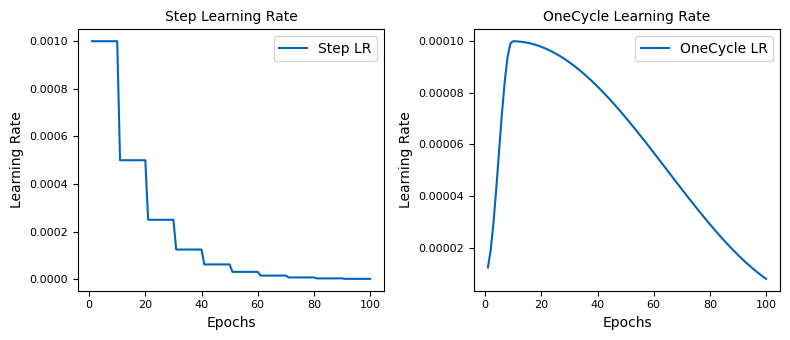

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure matplotlib (set LaTeX to False in this example).
plt.rc('text', usetex=False)


# Read the CSV file (adjust filename/path as needed).
data = pd.read_csv('/workspace/results/Learning_rate/LR.csv')

# Assuming the CSV columns are in the order:
# Column 1: Number of Epochs
# Column 2: Step Learning Rate
# Column 3: OneCycle Learning Rate
epochs = data.iloc[:, 0]
onecycle_lr = data.iloc[:, 1]
step_lr = data.iloc[:, 2] 

# Create a 1x2 grid of subplots.
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# Left subplot: Step Learning Rate.
axes[0].plot(epochs, step_lr, color='#0065BD', label=r'Step LR')
axes[0].set_xlabel(r'Epochs', fontsize=10)
axes[0].set_ylabel(r'Learning Rate', fontsize=10)
axes[0].set_title(r'Step Learning Rate', fontsize=10)
#axes[0].xticks(fontsize=12)
#axes[0].yticks(fontsize=12)
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)
axes[0].legend()
#axes[0].grid(True)
#axes[0].set_xticks([-80, -40, 0, 40, 80])  # Optional: set custom ticks if desired.

# Right subplot: OneCycle Learning Rate.
axes[1].plot(epochs, onecycle_lr, color='#0065BD', label=r'OneCycle LR')
axes[1].set_xlabel(r'Epochs', fontsize=10)
axes[1].set_ylabel(r'Learning Rate', fontsize=10)
axes[1].set_title(r'OneCycle Learning Rate', fontsize=10)
#axes[1].xticks(fontsize=12)
#axes[1].yticks(fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)
#axes[1].grid(True)
#axes[1].set_xticks([-80, -40, 0, 40, 80])  # Optional: adjust ticks as needed.

plt.tight_layout()
plt.savefig("learning_rate.svg", dpi=300, bbox_inches='tight')
plt.show()


# Download the wandb logs and save in the required format

In [ ]:
import wandb


api = wandb.Api()

# Run path: "username/project/run_id"
#run = api.run("upendraarun-technical-university-of-munich/HRegNet/runs/pl96loen") # Adaption 1
#run = api.run("upendraarun-technical-university-of-munich/HRegNet/y2okbh6a") # Adaption 2 Hregnet with MI
run = api.run("upendraarun-technical-university-of-munich/HRegNet/uu6yk1wx") # Baseline Hregnet

history = run.history()

log_columns = ["train/total loss",
    "train/normalized chamfer loss",
    "train/chamfer loss",
    "train/MI loss",
    "train/transformation loss",
    "train/learning_rate_base",
    "train/learning_rate_block",
    "train/rotation-error-x",
    "train/rotation-error-y",
    "train/rotation-error-z",
    "train/rotation-error-xyz",
    "train/geodesic-distance",
    "train/translation-error-x",
    "train/translation-error-y",
    "train/translation-error-z",
    "train/translation-error-xyz",
    "train/euclidean-distance",
    "val/total loss",
    "val/normalized chamfer loss",
    "val/chamfer loss",
    "val/MI loss",
    "val/transformation loss",
    "val/rotation-error-x",
    "val/rotation-error-y",
    "val/rotation-error-z",
    "val/rotation-error-xyz",
    "val/geodesic-distance",
    "val/translation-error-x",
    "val/translation-error-y",
    "val/translation-error-z",
    "val/translation-error-xyz",
    "val/euclidean-distance"]


wandb_columns = [col for col in log_columns if col in history.columns]
filtered_history = history[wandb_columns]

filtered_history.to_csv("Baseline_hregnet.csv", index=False)



wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from yo

# Plot Training loss

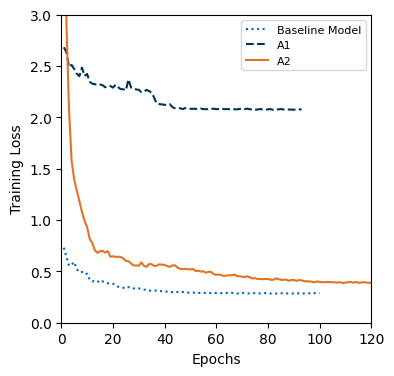

In [3]:
import pandas as pd
import matplotlib.pyplot as plt




# List the paths to your CSV files.
csv_files = [
    "/workspace/wandb_logs/Baseline_hregnet.csv",
    "/workspace/wandb_logs/Adaption_1_hregnet_mi.csv",
    "/workspace/wandb_logs/Adaption_2_hregnet_ptv3.csv",
    #"model4_loss.csv"
]

labels = {
    csv_files[0]: "Baseline Model",
    csv_files[1]: "A1",
    csv_files[2]: "A2"
    #csv_files[3]: "A2 + MI"
}

plot_style = {
    csv_files[0]: {"color": "#0065BD", "linestyle": "dotted"},
    csv_files[1]: {"color": "#003359", "linestyle": "dashed"},
    csv_files[2]: {"color": "#E37222", "linestyle": "solid"}
    #csv_files[3]: {"color": "A2AD00", "linestyle": "dotdash"}
}


plt.figure(figsize=(4, 4)) #9,7

# Loop through each CSV file, load it, and plot the loss curve.
for file in csv_files:
    # Load the CSV file into a DataFrame.
    df = pd.read_csv(file)
    
    # Assuming the column with the loss values is named 'loss'
    # Generate an epoch range based on the number of rows.
    epochs = range(1, len(df) + 1)
    
    # Plot the curve.
    plt.plot(epochs, df["train/total loss"], 
             label=labels[file],
             color=plot_style[file]["color"],
             linestyle=plot_style[file]["linestyle"]
             )

plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Training Loss", fontsize=10)
#plt.title("Training Loss")
plt.legend(fontsize=8)
plt.ylim(0, 3)
plt.xlim(0, 120)
#plt.grid(True)
plt.savefig("train_loss.svg", dpi = 300, bbox_inches='tight')
plt.show()



# Plot Validation loss

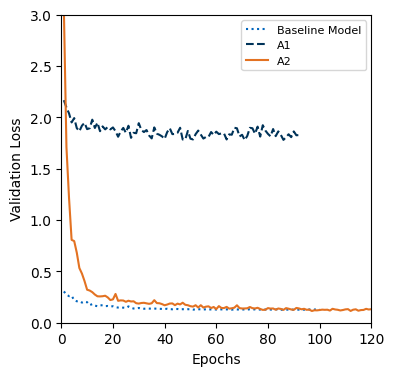

In [4]:
import pandas as pd
import matplotlib.pyplot as plt




# List the paths to your CSV files.
csv_files = [
    "/workspace/wandb_logs/Baseline_hregnet.csv",
    "/workspace/wandb_logs/Adaption_1_hregnet_mi.csv",
    "/workspace/wandb_logs/Adaption_2_hregnet_ptv3.csv",
    #"model4_loss.csv"
]

labels = {
    csv_files[0]: "Baseline Model",
    csv_files[1]: "A1",
    csv_files[2]: "A2"
    #csv_files[3]: "A2 + MI"
}

plot_style = {
    csv_files[0]: {"color": "#0065BD", "linestyle": "dotted"},
    csv_files[1]: {"color": "#003359", "linestyle": "dashed"},
    csv_files[2]: {"color": "#E37222", "linestyle": "solid"}
    #csv_files[3]: {"color": "A2AD00", "linestyle": "dotdash"}
}


plt.figure(figsize=(4,4)) #9,7

# Loop through each CSV file, load it, and plot the loss curve.
for file in csv_files:
    # Load the CSV file into a DataFrame.
    df = pd.read_csv(file)
    
    # Assuming the column with the loss values is named 'loss'
    # Generate an epoch range based on the number of rows.
    epochs = range(1, len(df) + 1)
    
    # Plot the curve.
    plt.plot(epochs, df["val/total loss"], 
             label=labels[file],
             color=plot_style[file]["color"],
             linestyle=plot_style[file]["linestyle"]
             )

plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Validation Loss", fontsize=10)
#plt.title("Training Loss")
plt.legend(fontsize=8)
plt.ylim(0, 3)
plt.xlim(0, 120)
#plt.grid(True)
plt.savefig("val_loss.svg", dpi = 300, bbox_inches='tight')
plt.show()




# Plot Different Losses

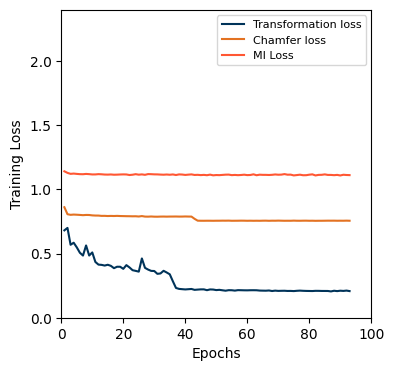

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the CSV file.
csv_file = "/workspace/wandb_logs/Adaption_1_hregnet_mi.csv"

# Load the CSV file into a DataFrame.
df = pd.read_csv(csv_file)

# Create a mapping from column names to desired labels.
column_labels = {
    #"train/total loss": "Total loss",
    "train/transformation loss": "Transformation loss",
    "train/normalized chamfer loss": "Chamfer loss",
    "train/MI loss": "MI Loss"
}

# Create a mapping for each column to its own style.
# Here we use the styles from your multi-model code, and we add a fourth style for "mi loss".
column_styles = {
    #"train/total loss": {"color": "#0065BD", "linestyle": "solid"},
    "train/transformation loss": {"color": "#003359", "linestyle": "solid"},
    "train/normalized chamfer loss": {"color": "#E37222", "linestyle": "solid"},
    "train/MI loss": {"color": "#FF5733", "linestyle": "solid"}  # example style for the fourth column
}

plt.figure(figsize=(4, 4))

# Generate an epoch range assuming each row represents an epoch.
epochs = range(1, len(df) + 1)

# Loop over each column and plot using its corresponding style.
for col in column_labels:
    plt.plot(
        epochs,
        df[col],
        label=column_labels[col],
        color=column_styles[col]["color"],
        linestyle=column_styles[col]["linestyle"]
    )

plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Training Loss", fontsize=10)
#plt.title("Training Loss")
plt.legend(fontsize=8)
plt.ylim(0, 2.4)
plt.xlim(0, 100)
#plt.grid(True)
plt.savefig("diff_train_loss.svg", dpi = 300, bbox_inches='tight')
plt.show()
